<h1><center>SimpleITK Tutorial</center></h1>

# 3D Images with SimpleITK

Author: José D. Tascón-Vidarte \
Email: jota@di.ku.dk \
University of Copenhagen

Objectives:
- Learn how to create images with SimpleITK
- Reading images and show its properties
- Plotting images with numpy and matplotlib

The documentation of SimpleITK is available at https://itk.org/SimpleITKDoxygen100/html/index.html

This tutorial is based on the Notebooks provided by the Insight Software Consortium. http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/

##  Cloning files

Open the files to be used from github.

In [23]:
# !rm -rf /content/registration_tutorial/
# !git clone https://github.com/josetascon/registration_tutorial.git

## Import Libraries

Import the libraries to be used.

In [2]:
# !pip install simpleitk           # install simpleitk in colabs

import SimpleITK as sitk         # simpleitk library
import os                        # os library, used to read files
import sys                       # sys library, used to include local py files
import numpy as np               # array and matrix library
import matplotlib.pyplot as plt  # plot library

from ipywidgets import interact, fixed # jupyter widgets libraries

# sys.path.insert(0, '/content/registration_tutorial/') # local library path
from local_utils import image_info, imshow_2d # local file local_utils.py

## The Image Class

The most important class in SimpleITK is the Image Class. Several algorithms (functions) use this class as an input parameter.

The constructor of the image class is: sitk.Image(...)
- A monochromatic 3D image is created with four inputs: width, height, depth, PixelIDValueEnum.
- An RGB or any other multichannel image is created with the imputs: [width, height, depth] , PixelIDValueEnum, channels

An example of this is:


In [3]:
image_3D = sitk.Image(128, 128, 64, sitk.sitkInt16)
image_3D_RGB = sitk.Image([64, 64, 64], sitk.sitkVectorUInt8,3)

For more information of the Image Class see file [01_images_2d](01_images_2d.ipynb) of this tutorial.

The image_info() created before can be called to summarize the information of an image. This function is stored in file [local_utils.py](./local_utils.py) and imported here.

In [4]:
print(image_info(image_3D))
print(image_info(image_3D_RGB))


===== Image Information =====
Pixel type: 		16-bit signed integer
Pixel channels: 	1
Dimensions: 		3
Size: 			(128, 128, 64)
Length (mm): 		(1.0, 1.0, 1.0)
Total Elements: 	1048576


===== Image Information =====
Pixel type: 		vector of 8-bit unsigned integer
Pixel channels: 	3
Dimensions: 		3
Size: 			(64, 64, 64)
Length (mm): 		(1.0, 1.0, 1.0)
Total Elements: 	262144



## Reading a 3D Image

The method to read images with SimpleITK is: <b>sitk.ReadImage(...)</b>

SimpleITK support different image formats such as:
- Raw format (.mhd or .mha)
- NIFTI format (.nii)
- DICOM series (.dcm)

The images used here are found in the local folder [images/](./images/)

Credits:
* training_001_ct.mhd: http://www.insight-journal.org/rire/
* mni_icbm152_t1_tal_nlin_asym_09a.nii: [http://www.bic.mni.mcgill.ca/](http://www.bic.mni.mcgill.ca/ServicesAtlases/ICBM152NLin2009)
* Dicom Series: http://www.giveascan.org/



### Example reading a Raw file. 

This format is also known as ITK MetaImage format. A example of reading one file.

In [5]:
prefix = './images/'
# prefix = "/content/registration_tutorial/images/"

image_mhd = sitk.ReadImage(prefix + 'ct/training_001_ct.mhd') # http://www.insight-journal.org/rire/
print(image_info(image_mhd))


===== Image Information =====
Pixel type: 		16-bit signed integer
Pixel channels: 	1
Dimensions: 		3
Size: 			(512, 512, 29)
Length (mm): 		(0.653595, 0.653595, 4.0)
Total Elements: 	7602176



The format .mhd refers to the header of a raw image. This header contains information about the encoding of the data. If you open this file directly as a text file you can read the information.

In [6]:
file_mhd = open(prefix + 'ct/training_001_ct.mhd','r') # open the file as a regular text file
print(file_mhd.read())                               # Detail the header content
file_mhd.close()

ObjectType = Image
NDims = 3
BinaryDataByteOrderMSB = True
AnatomicalOrientation = LPH
ElementSpacing = 0.653595 0.653595 4.000000
DimSize = 512 512 29
ElementType = MET_SHORT
ElementDataFile = image.bin



The file has the information how the bytes of data are stored. This file refers to another file where the actual image information is saved. In this case to the file 'image.bin'. SimpleITK automaticaly read the file and identify the data in order to read the image.

Another type of raw format is .mha. In this format the same file stores the header and also the data.

### Example reading a NIFTI file.

The NIFTI image is downloaded from the dataset MNI-ICBM, and the template ICBM 2009a Nonlinear Asymmetric template. This data is part of a collection of MRI atlas templates for pediatric studies that represent the average anatomy for the age range of 4.5–18.5 years. The image to read is an MRI scan T1-weigthed image, mni_icbm152_t1_tal_nlin_asym_09a.nii:

In [7]:
image_nii = sitk.ReadImage(prefix + 'mni_icbm152_t1_tal_nlin_asym_09a.nii')
print(image_info(image_nii))


===== Image Information =====
Pixel type: 		32-bit float
Pixel channels: 	1
Dimensions: 		3
Size: 			(197, 233, 189)
Length (mm): 		(1.0, 1.0, 1.0)
Total Elements: 	8675289



### Example reading DICOM series.

Digital Imaging and Communications in Medicine (DICOM) is the standard for the communication and management of medical imaging information and related data. For a description see the [Wiki](https://en.wikipedia.org/wiki/DICOM). The typical format of DICOM files is .dcm. The DICOM files to read are from the dataset Give a Scan, study 4, series 3.

Since, several files in a folder represent an image, it is necesary to read all the files. The following example show this:

In [8]:
path = prefix + 'Series3/IMG00000/'  # path where the dicom series files are.
files = os.listdir(path)            # list with all dicom files
files.sort()
path_files = []
for file in files:                   # create a list with path/files names
    path_files.append(path+file)     # append the files names. The file name is path/file
print('DICOM files: ' + path_files[0] + ', ... , ' + path_files[-1]) # print first and last file names

DICOM files: ./images/Series3/IMG00000/IMG00000, ... , ./images/Series3/IMG00000/IMG00055


Now, the list 'path_files' is used to read the image.

In [9]:
image_dcm = sitk.ReadImage(path_files)
print(image_info(image_dcm))


===== Image Information =====
Pixel type: 		32-bit signed integer
Pixel channels: 	1
Dimensions: 		3
Size: 			(512, 512, 56)
Length (mm): 		(0.666016, 0.666016, 5.0)
Total Elements: 	14680064



This format is not very handy since a single file is splitted in a series of files. In order to have a unique file is possible to write the image to a regular Raw or NIFTI format.

## Writing a 3D Image

SimpleITK also support image writing. The method to read images with SimpleITK is: sitk.WriteImage(...)

As mentioned, the write nction is usefull to create a single file from the dicom series. This can be done with:

In [10]:
sitk.WriteImage(image_dcm, prefix + 'lungs_ct.nii')

Similarly, to use a single file in the Raw format we store the image with the extension .mha

In [11]:
sitk.WriteImage(image_mhd, prefix + 'training_001_ct.mha')

## NumPy Conversion 

A Numpy array can be obtained with SimpleITK. Similar to the example [01_images_2d](01_images_2d.ipynb) of this tutorial. 

A numpy array can be obtained back and forth with the functions:

In [12]:
image_npa = sitk.GetArrayFromImage(image_dcm)   # Get NumPy array from sitk.Image
image_itk = sitk.GetImageFromArray(image_npa)   # Get sitk.Image from NumPy array

print(image_npa.dtype)
print(image_npa.shape)
print(image_npa.size)

int32
(56, 512, 512)
14680064


## Plot 3D Images in 2D

Transforming sitk.Image to NumPy also enable plotting with Matplotlib. Matplotlib provides an object-oriented API for embedding plots into applications. Considering that the images are in 3D, this enable 3 views typically used in medical imaging. These are the axial, sagital and coronal view. Some useful functions are declared to perform this.


In [13]:
# Set of functions to visualize a 3D image
def imshow_axial(range_z, image_itk, flip = False):
    # Scale the image with the pixel size and spacing in mm
    spacing = image_itk.GetSpacing() # scale in mm
    size = image_itk.GetSize()       # pixel width and height
    extent = (0, np.ceil(spacing[0]*size[0]), np.ceil(spacing[1]*size[1]), 0) #image limits
    
    image_npa = sitk.GetArrayViewFromImage(image_itk) # get numpy array

    # Create a figure with the axial
    if flip:
        plt.imshow(image_npa[-range_z,:,::-1], extent=extent, cmap=plt.cm.Greys_r)
    else:
        plt.imshow(image_npa[range_z,:,:], extent=extent, cmap=plt.cm.Greys_r)
    plt.title('Axial image')
    plt.axis('off')
    plt.show() # Draw the axial image
    return

def imshow_sagital(range_y, image_itk, flip = False):#, image_itk):
    # Scale the image with the pixel size and spacing in mm
    spacing = image_itk.GetSpacing() # scale in mm
    size = image_itk.GetSize()       # pixel width and height
    extent = (0, np.ceil(spacing[1]*size[1]), np.ceil(spacing[2]*size[2]), 0) #image limits
    
    image_npa = sitk.GetArrayViewFromImage(image_itk) # get numpy array
    
    # Create a figure with the sagital
    if flip:
        plt.imshow(image_npa[::-1,:,-range_y], extent=extent, cmap=plt.cm.Greys_r)
    else:
        plt.imshow(image_npa[:,:,range_y], extent=extent, cmap=plt.cm.Greys_r)
    plt.title('Sagital image')
    plt.axis('off')
    plt.show() # Draw the sagital image
    return

def imshow_coronal(range_x, image_itk, flip = False):#, image_itk):
    # Scale the image with the pixel size and spacing in mm
    spacing = image_itk.GetSpacing() # scale in mm
    size = image_itk.GetSize()       # pixel width and height
    extent = (0, np.ceil(spacing[0]*size[0]), np.ceil(spacing[2]*size[2]), 0) # image limits
    
    image_npa = sitk.GetArrayViewFromImage(image_itk) # get numpy array
    
    # Create a figure with the coronal
    if flip:
        plt.imshow(image_npa[::-1,-range_x,:], extent=extent, cmap=plt.cm.Greys_r)
    else:
        plt.imshow(image_npa[:,range_x,:], extent=extent, cmap=plt.cm.Greys_r)
    plt.title('Coronal image')
    plt.axis('off')
    plt.show()
    return

These functions can be used to display the loaded 3D images. Test each image by removing the comment line.

<b>Note:</b> These functions are stored in a local file called [local_utils.py](./local_utils.py) for further usage.

In [14]:
# image = sitk.ReadImage(prefix + 'training_001_mr_T1.mha', sitk.sitkFloat32)
# image = sitk.ReadImage(prefix + 'training_001_ct.mha', sitk.sitkFloat32)
# image = sitk.ReadImage(prefix + 'mni_icbm152_t1_tal_nlin_asym_09a.nii', sitk.sitkFloat32)
image = sitk.ReadImage(prefix + 'lungs_ct.nii', sitk.sitkFloat32)

interact(imshow_axial, range_z =(0,image.GetSize()[2]-1), image_itk = fixed(image));
interact(imshow_sagital, range_y =(0,image.GetSize()[1]-1), image_itk = fixed(image));
interact(imshow_coronal, range_x =(0,image.GetSize()[0]-1), image_itk = fixed(image));

interactive(children=(IntSlider(value=27, description='range_z', max=55), Checkbox(value=False, description='f…

interactive(children=(IntSlider(value=255, description='range_y', max=511), Checkbox(value=False, description=…

interactive(children=(IntSlider(value=255, description='range_x', max=511), Checkbox(value=False, description=…

## Extracting a Slice from a 3D Image

Voxel values can also be accesed with array index. This allows to easily extract slices from 3D images. The next example show this:

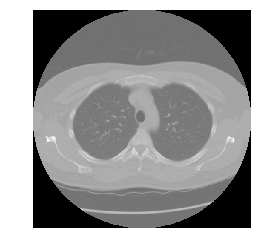

In [15]:
slide = image[:,:,14]
imshow_2d(slide)

The slide can be save as a 2D image in a regular format.

In [16]:
sitk.WriteImage(slide, prefix + 'slide.nii')

## Plot in 3D

The library ipyvolume is used to plot in 3D in a jupyter notebook.

The function imshow_3d() is defined to plot a sitk.Image.

In [17]:
# !pip install ipyvolume    # install ipyvolume in colabs

import ipyvolume as ipv   # library to visualize 3D volumes.

def imshow_3d(image_itk, controls = False):
    # Function to show a 3D image with ipyvolume
    # Input: sitk.Image
    # Output: None
    volume = sitk.GetArrayFromImage(image_itk) # get numpy array
    
    # Adjusting the proper scale of the image
    spacing = image_itk.GetSpacing() # scale in mm
    size = image_itk.GetSize()       # pixel width and height
    extent = [[0, np.ceil(spacing[0]*size[0])],[0, np.ceil(spacing[1]*size[1])], 
              [0, np.ceil(spacing[2]*size[2])]] # image limits
    mx = np.max(np.max(extent))
    mn = np.min(np.min(extent))
    
    # Plot the volume
    ipv.figure()
    vshow = ipv.volshow(volume, extent = extent, controls = controls)
    # vshow = ipv.volshow(volume, opacity=0.03, level_width=0.1, data_min=0, data_max=1)
    ipv.xyzlim(mn, mx)
    ipv.show()
    return

<b>Note:</b> This function is stored in a local file called [local_utils.py](./local_utils.py) for further usage.

Now, the previous images can be plotted.

In [18]:
imshow_3d(image_nii)

In [22]:
imshow_3d(image_dcm, controls = True)

### Note: The functions imshow_axial( ), imshow_sagital(), imshow_coronal and imshow_3d are stored in the local file utils.py